## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model


model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

def plotHistory(mod):
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

# 將 Epoch 加到 500 個，並觀察 learning curve 的走勢

In [5]:
"""
Compile your model
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

In [6]:
"""
Set epochs
"""
epochs = 500

model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test),
          verbose=0,
          shuffle=True)

Instructions for updating:
Use tf.cast instead.


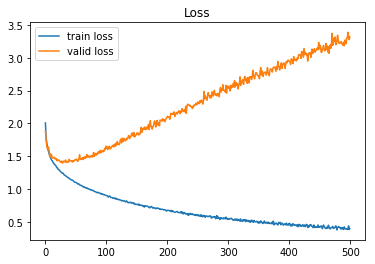

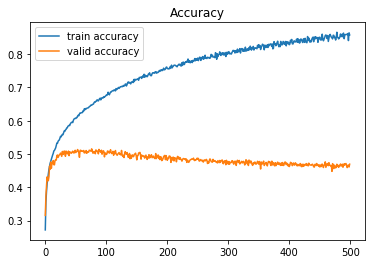

In [7]:
plotHistory(model)

# 將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [8]:
# Creating model
model = build_mlp()

# Setting model parameters
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')


# Traing model
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test),
          verbose=0,
          shuffle=True)

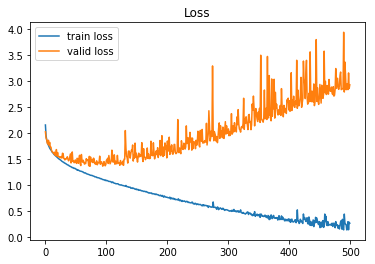

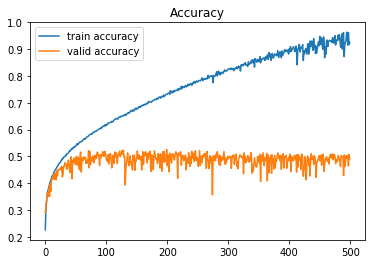

In [9]:
plotHistory(model)